# Factor Analysis

**Factor Analysis Definition:**  
Factor analysis is a multivariate statistical technique employed to identify the underlying relationships among observed variables by reducing them into a smaller set of unobserved variables, known as **factors**. These factors account for the common variance present across the original variables, simplifying the data structure. The method helps reveal patterns and structures within complex datasets, providing insights that may not be immediately apparent from individual variables.

### First Use of Factor Analysis in Agriculture:  
Factor analysis was first applied in agriculture in the **United States** during the **early 1930s** to examine the intricate relationships between various factors influencing agricultural productivity. Early agricultural research, particularly by agricultural economists and scientists, utilized this technique to uncover latent patterns among critical variables such as soil quality, crop yield, water usage, and labor input. This foundational work helped inform better decision-making and resource management practices in agriculture.

### Key Applications of Factor Analysis in Agriculture:
1. **Soil and Crop Productivity Assessment:**  
   Factor analysis is instrumental in identifying key factors influencing crop yield, such as soil quality, water availability, fertilizer usage, and climatic conditions, thus improving agricultural productivity assessments.

2. **Resource Management Optimization:**  
   The technique aids in discerning the most influential resources (e.g., water, fertilizers, labor) impacting agricultural productivity. This understanding facilitates more efficient allocation and management of resources.

3. **Promotion of Sustainable Agricultural Practices:**  
   By identifying the factors that affect both environmental sustainability and economic viability, factor analysis helps shape sustainable farming practices that balance ecological health with agricultural output.

4. **Enhancement of Agricultural Efficiency:**  
   Factor analysis uncovers hidden relationships within large datasets, thereby enhancing the efficiency of farming operations. By targeting areas of improvement, it contributes to optimizing farm management processes.

5. **Informed Policy Development:**  
   Agricultural policy-makers and organizations leverage factor analysis to identify the key drivers of agricultural success. These insights are integral for formulating policies aimed at improving food security, supporting rural development, and fostering long-term agricultural growth.

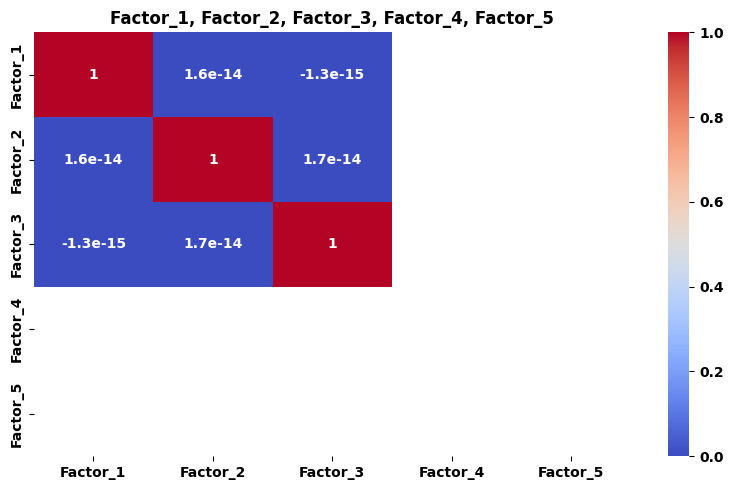

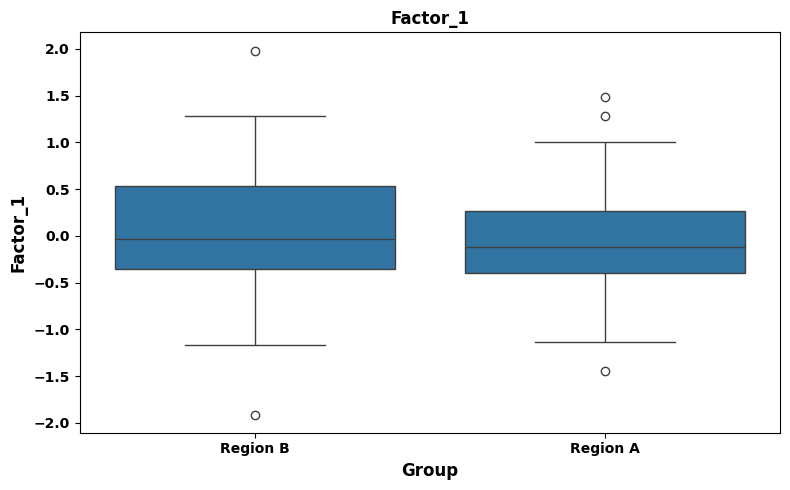

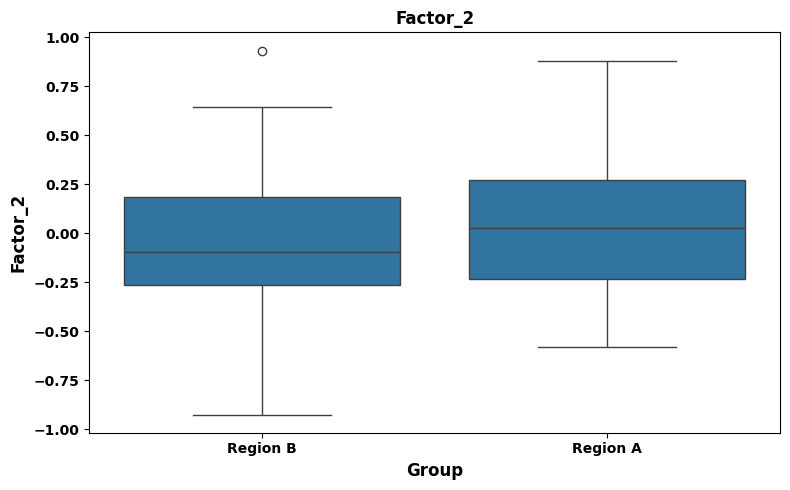

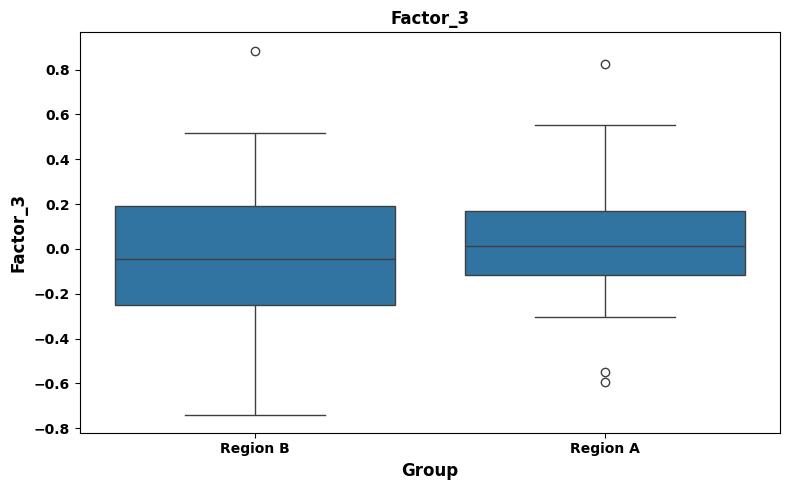

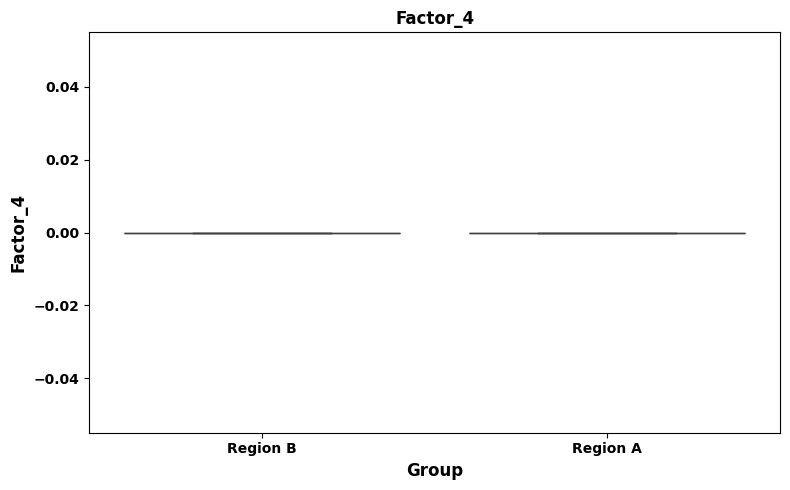

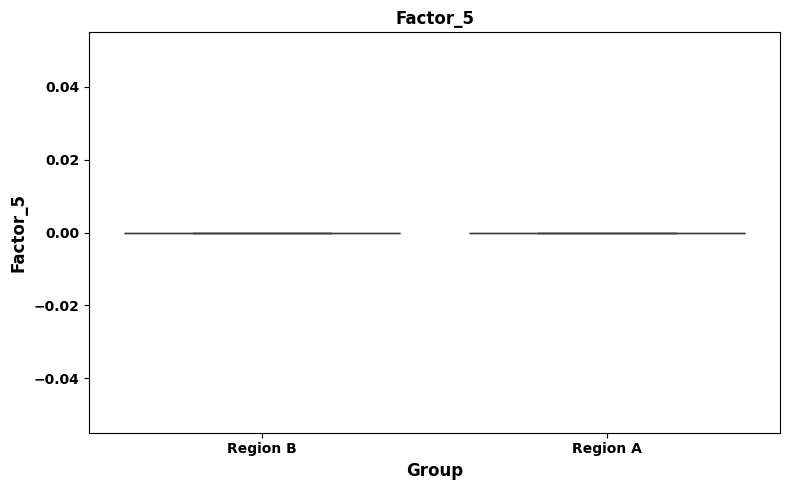

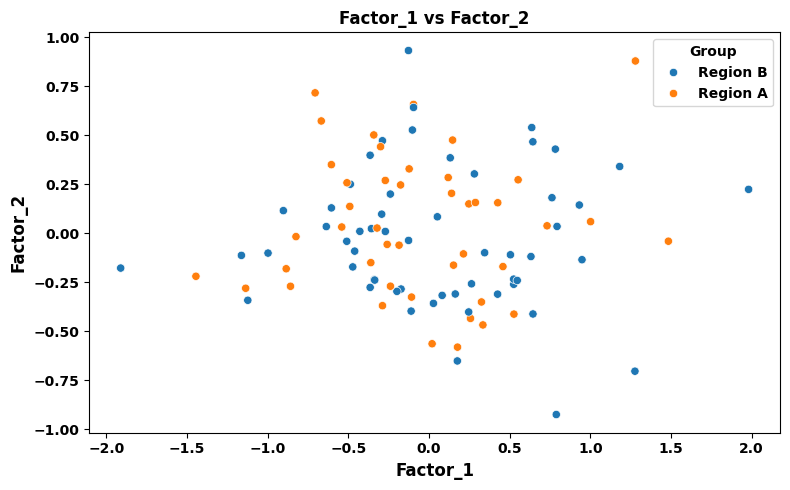

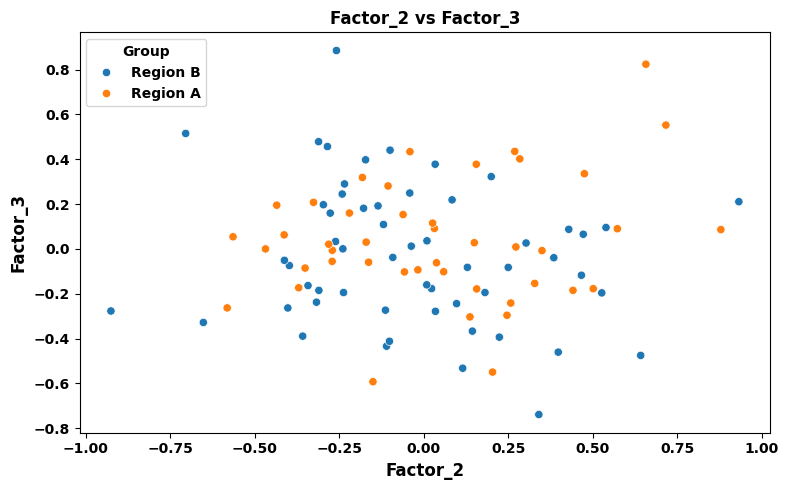

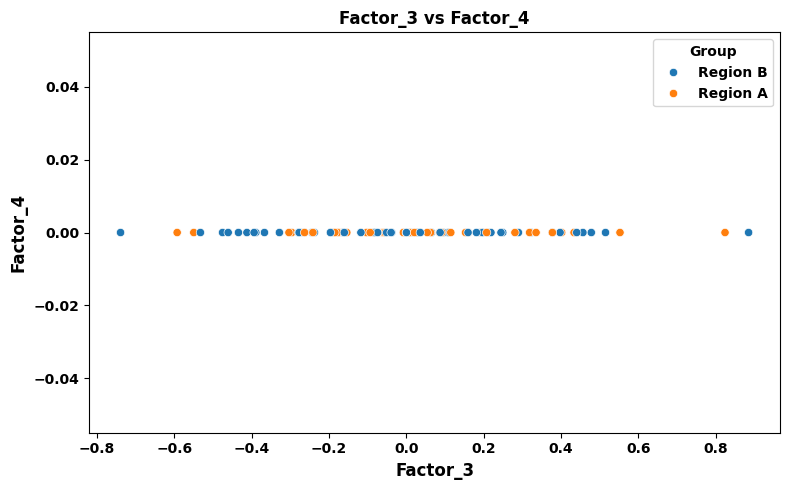

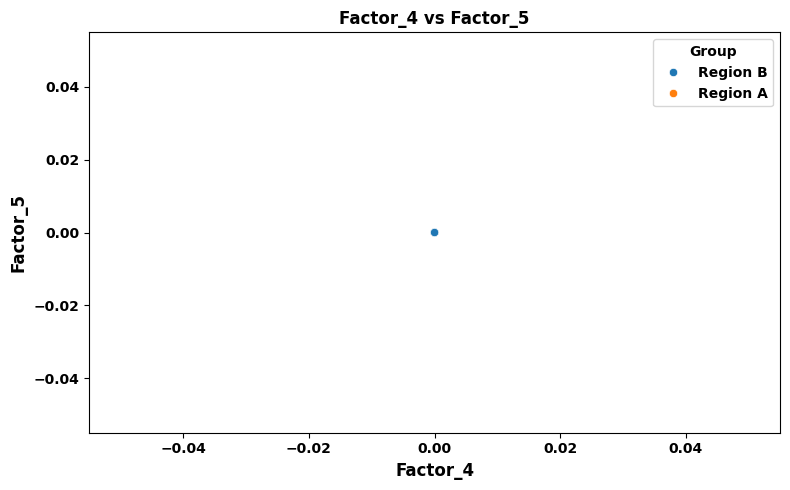

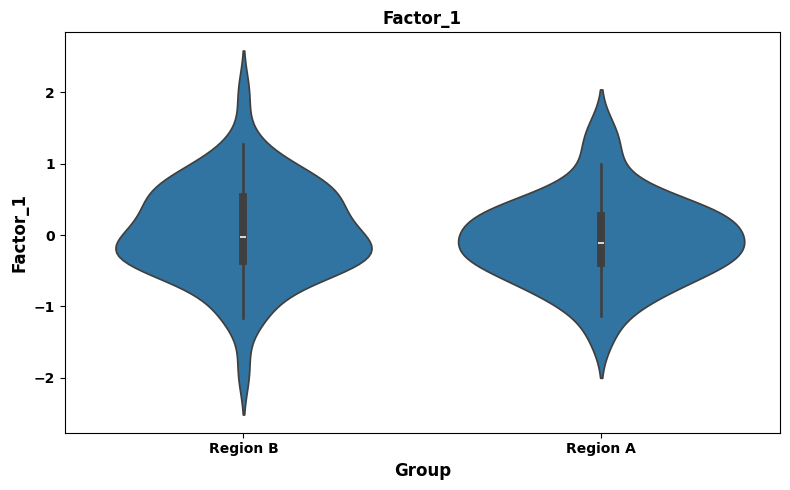

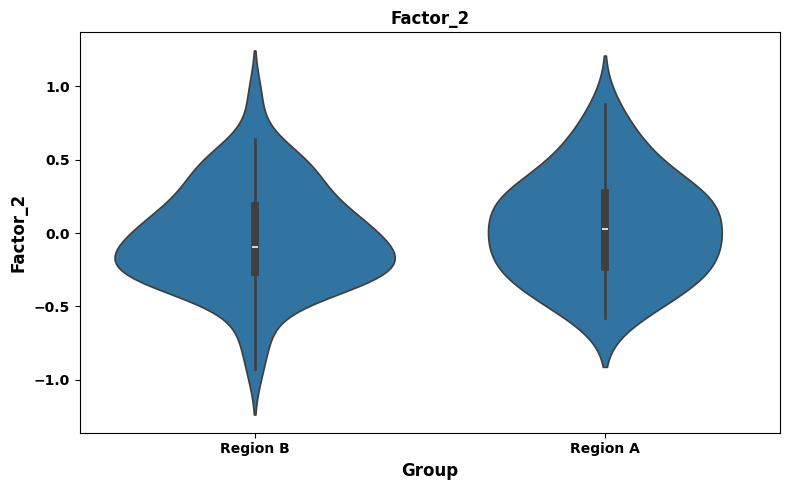

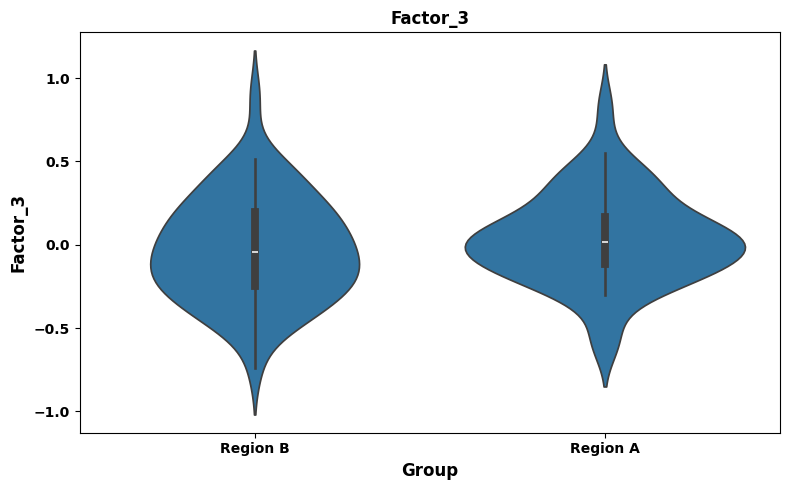

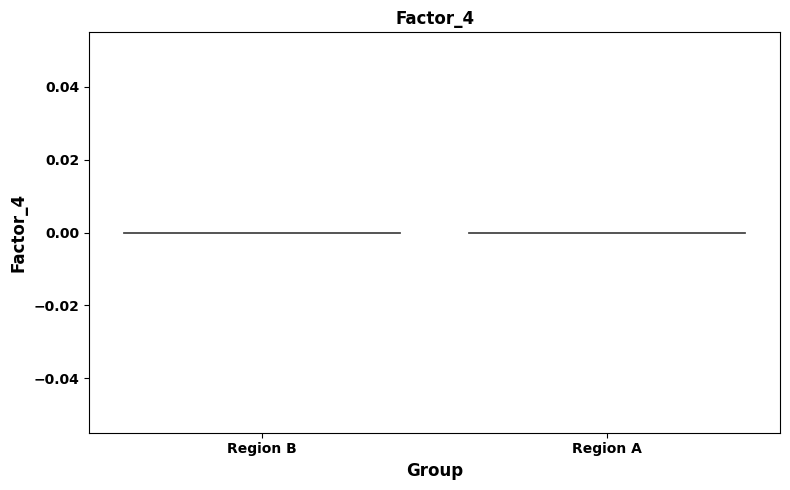

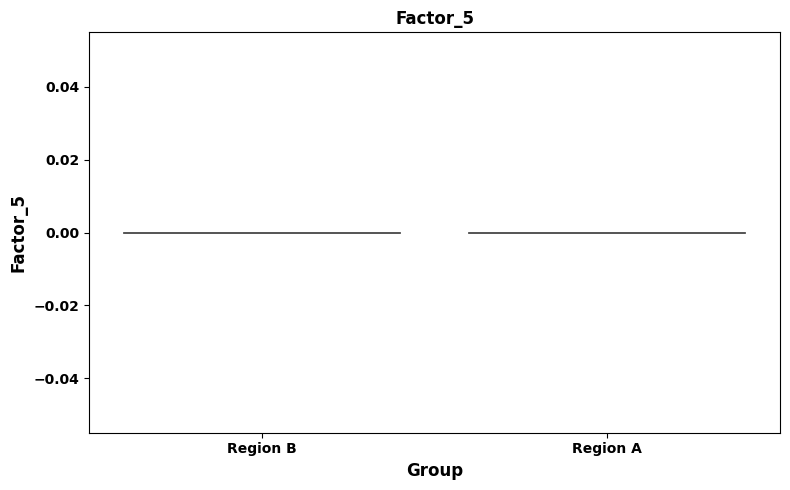

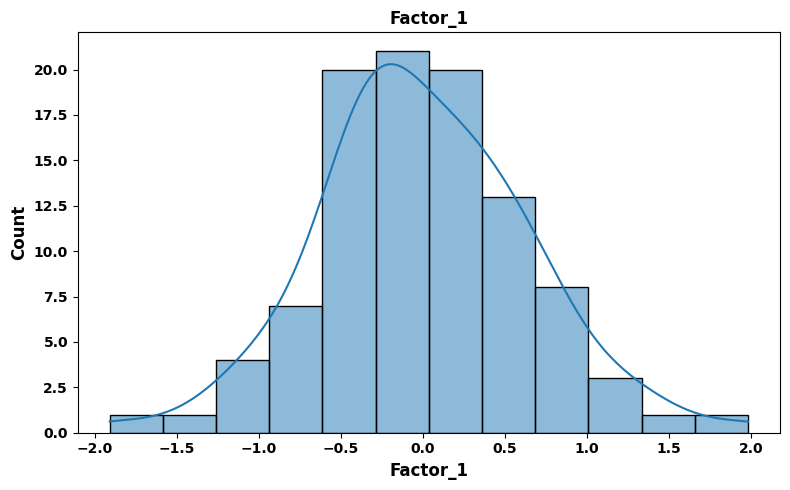

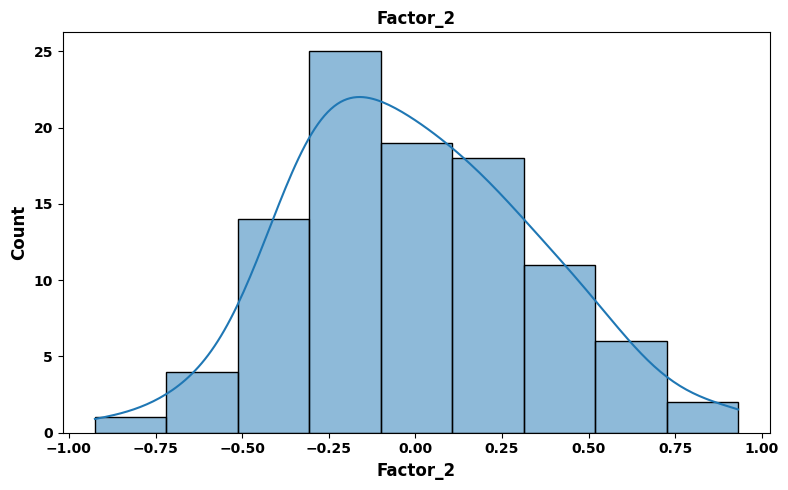

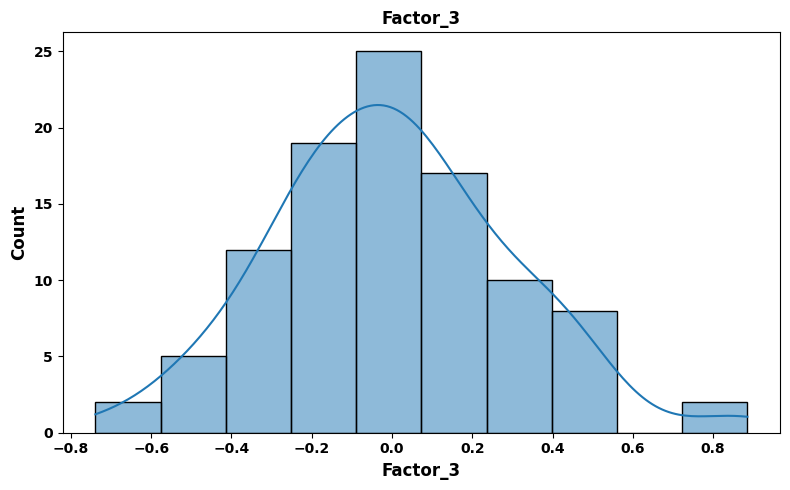

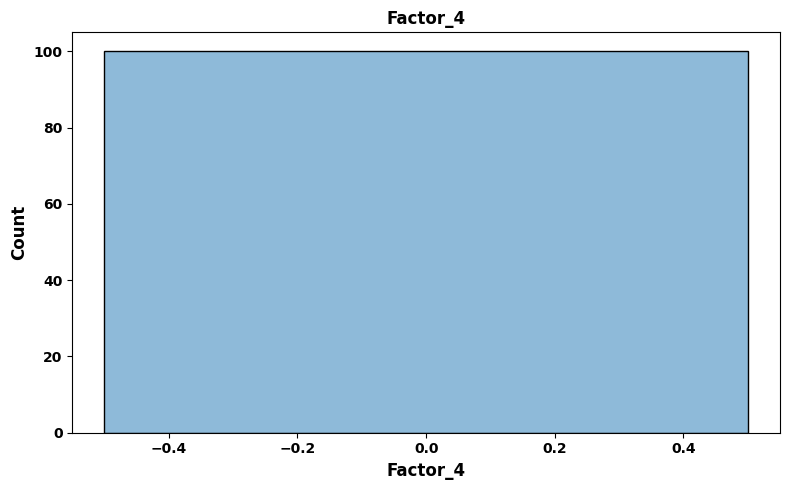

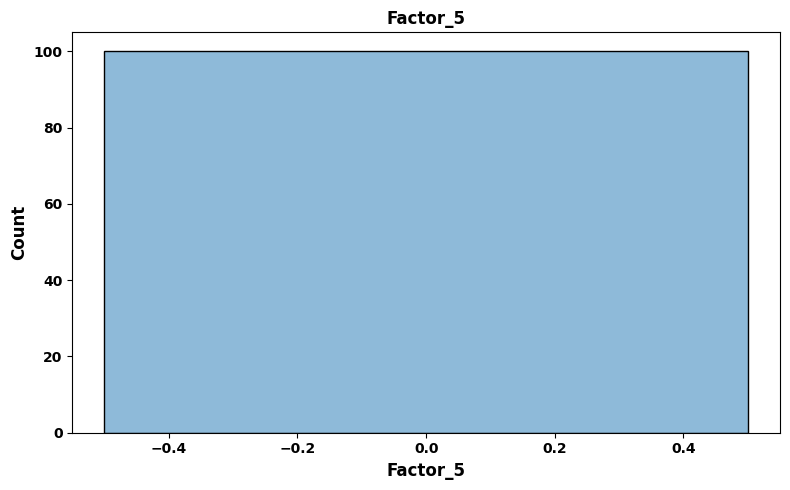

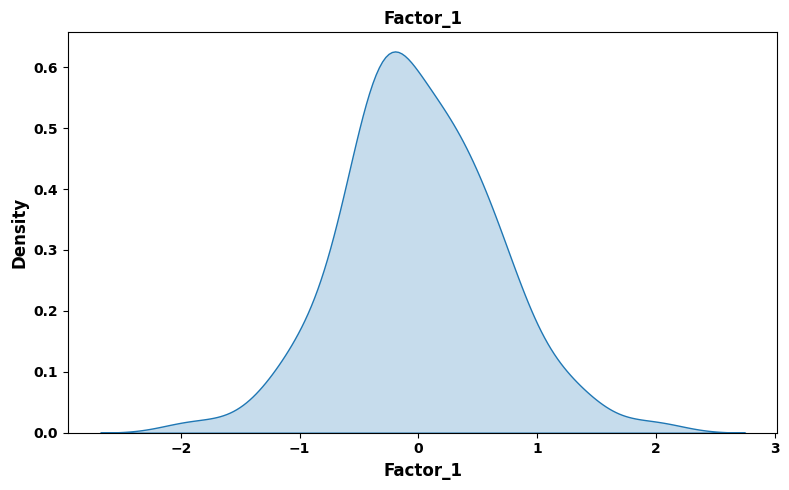

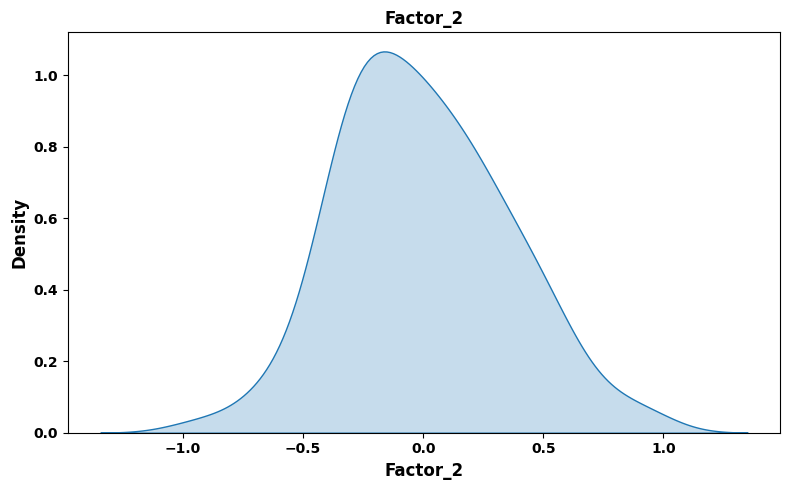

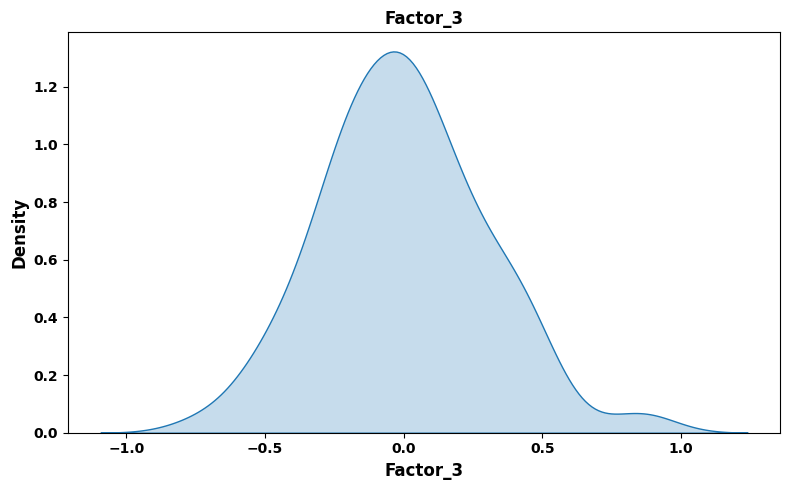

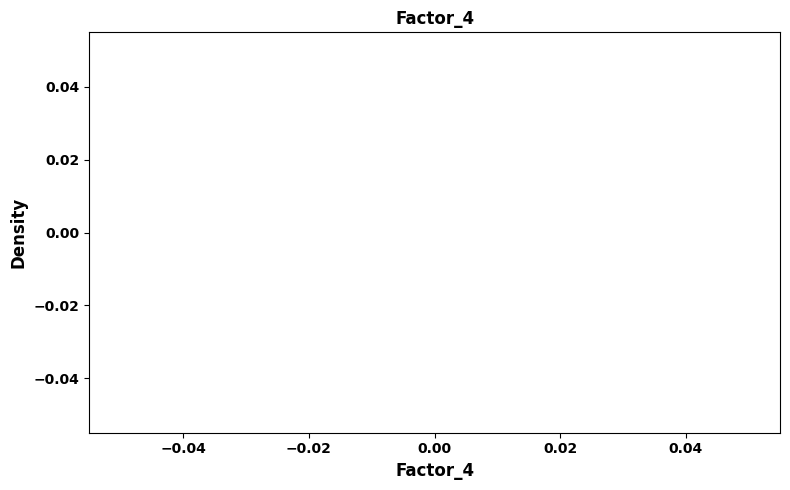

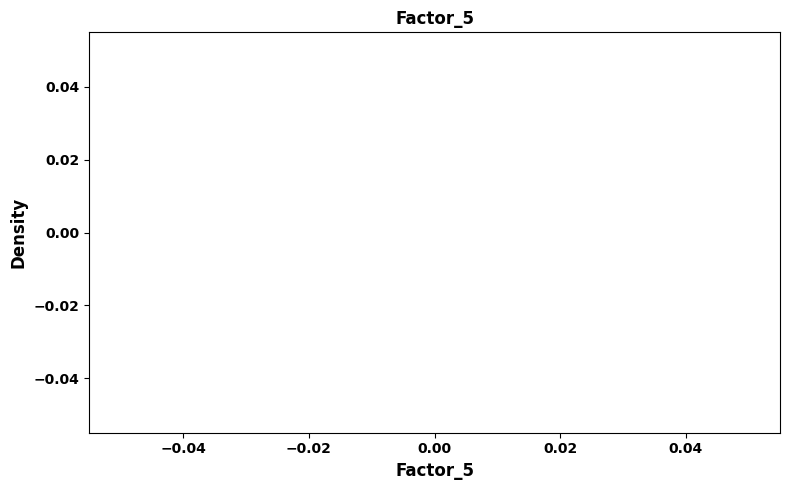

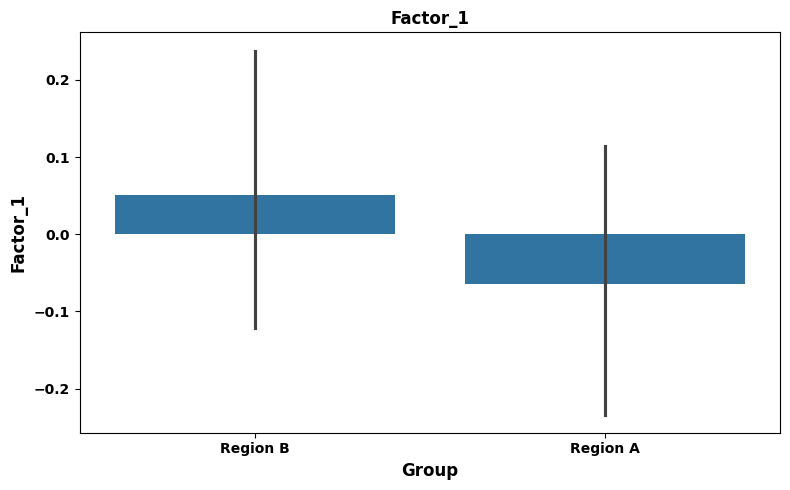

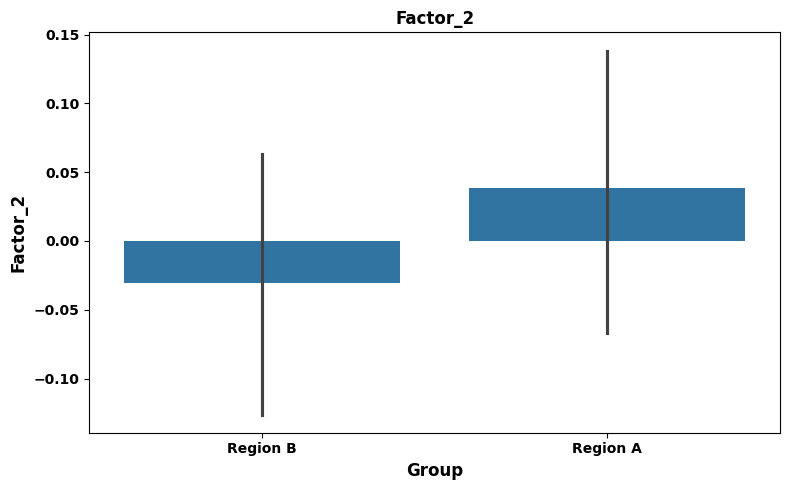

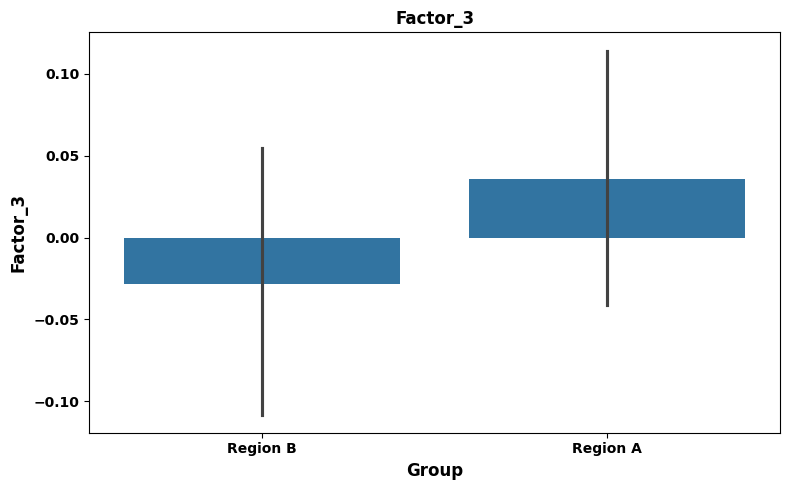

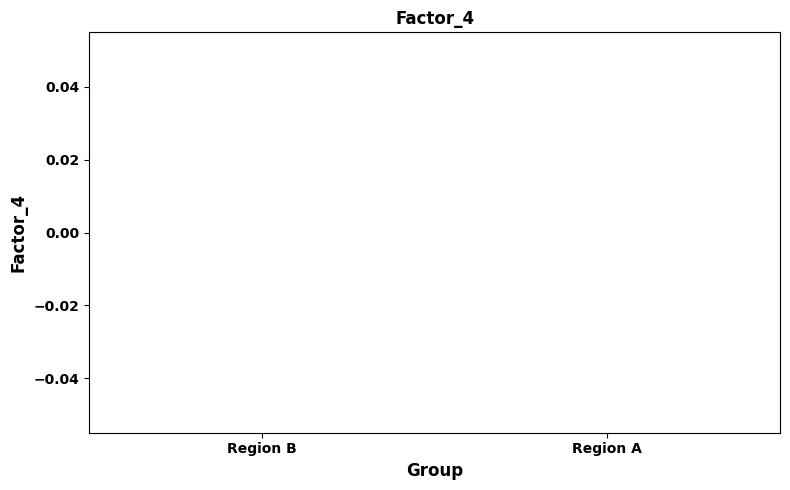

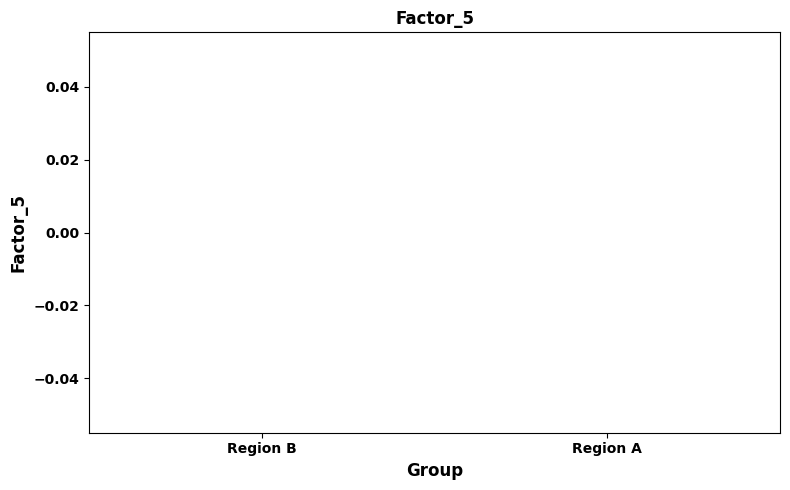


Interpretation Summary:
Factor 1:
  - Significant variables influencing this factor: Labor_Hours, Soil_Quality, Crop_Yield, Water_Usage, Fertilizer_Amount
  - Explained variance: 0.41
  - Factor scores indicate the relative influence of these variables.

Factor 2:
  - Significant variables influencing this factor: Crop_Yield, Fertilizer_Amount, Water_Usage, Labor_Hours, Soil_Quality
  - Explained variance: 0.12
  - Factor scores indicate the relative influence of these variables.

Factor 3:
  - Significant variables influencing this factor: Water_Usage, Fertilizer_Amount, Soil_Quality, Labor_Hours, Crop_Yield
  - Explained variance: 0.09
  - Factor scores indicate the relative influence of these variables.

Factor 4:
  - Significant variables influencing this factor: Labor_Hours, Crop_Yield, Fertilizer_Amount, Water_Usage, Soil_Quality
  - Explained variance: 0.00
  - Factor scores indicate the relative influence of these variables.

Factor 5:
  - Significant variables influencing thi

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Set global font weight for bold text
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelsize'] = 12  # Optional: adjust font size

# Step 1: Generate Synthetic Data
def generate_data(filename):
    np.random.seed(42)
    data = pd.DataFrame({
        'Soil_Quality': np.random.normal(50, 10, 100),
        'Water_Usage': np.random.normal(30, 5, 100),
        'Fertilizer_Amount': np.random.normal(20, 7, 100),
        'Crop_Yield': np.random.normal(200, 50, 100),
        'Labor_Hours': np.random.normal(80, 15, 100),
        'Group': np.random.choice(['Region A', 'Region B'], 100)
    })
    data.to_csv(filename, index=False)

# Step 2: Perform Factor Analysis
def perform_factor_analysis(input_file, num_factors=5):
    data = pd.read_csv(input_file)
    group_data = data['Group']  # Preserve 'Group'
    data = data.drop(columns=['Group'])  # Drop for factor analysis

    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    factor_analysis = FactorAnalysis(n_components=num_factors)
    factors = factor_analysis.fit_transform(data_scaled)

    factors_df = pd.DataFrame(factors, columns=[f'Factor_{i+1}' for i in range(num_factors)])
    factors_df['Group'] = group_data.values  # Add back 'Group'

    return factors_df, factor_analysis, data

# Step 3: Generate Dynamic Visualizations
def generate_visualizations(factors_df, original_data):
    # Heatmap
    plt.figure(figsize=(8, 5))
    sns.heatmap(factors_df.drop(columns='Group').corr(), annot=True, cmap='coolwarm')
    plt.title(', '.join(factors_df.drop(columns='Group').corr().columns), fontweight='bold')  # Set column name as title
    plt.tight_layout()
    plt.show()

    # Boxplots
    for factor in factors_df.columns[:-1]:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='Group', y=factor, data=factors_df)
        plt.title(factor, fontweight='bold')  # Set column name as title
        plt.tight_layout()
        plt.show()

    # Scatterplots
    for i in range(len(factors_df.columns[:-1]) - 1):
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=f'Factor_{i+1}', y=f'Factor_{i+2}', hue='Group', data=factors_df)
        plt.title(f'Factor_{i+1} vs Factor_{i+2}', fontweight='bold')  # Set comparison as title
        plt.tight_layout()
        plt.show()

    # Violin Plots
    for factor in factors_df.columns[:-1]:
        plt.figure(figsize=(8, 5))
        sns.violinplot(x='Group', y=factor, data=factors_df)
        plt.title(factor, fontweight='bold')  # Set column name as title
        plt.tight_layout()
        plt.show()

    # Histograms
    for factor in factors_df.columns[:-1]:
        plt.figure(figsize=(8, 5))
        sns.histplot(factors_df[factor], kde=True)
        plt.title(factor, fontweight='bold')  # Set column name as title
        plt.tight_layout()
        plt.show()

    # KDE Plots
    for factor in factors_df.columns[:-1]:
        plt.figure(figsize=(8, 5))
        sns.kdeplot(factors_df[factor], shade=True)
        plt.title(factor, fontweight='bold')  # Set column name as title
        plt.tight_layout()
        plt.show()

    # Bar Plots
    for factor in factors_df.columns[:-1]:
        plt.figure(figsize=(8, 5))
        sns.barplot(x='Group', y=factor, data=factors_df)
        plt.title(factor, fontweight='bold')  # Set column name as title
        plt.tight_layout()
        plt.show()

# Step 4: Generate Interpretation Summary
def generate_interpretation_summary(factor_analysis, factors_df, original_data):
    print("\nInterpretation Summary:")
    for i, factor in enumerate(factors_df.columns[:-1]):  # Exclude 'Group'
        print(f"Factor {i+1}:")
        loadings = factor_analysis.components_[i]
        sorted_loadings = np.argsort(np.abs(loadings))[::-1]
        significant_vars = [original_data.columns[j] for j in sorted_loadings[:5]]

        print(f"  - Significant variables influencing this factor: {', '.join(significant_vars)}")
        print(f"  - Explained variance: {np.var(factors_df[factor]):.2f}")
        print(f"  - Factor scores indicate the relative influence of these variables.\n")

# End-to-End Execution
data_filename = 'agriculture_factor_data.csv'
generate_data(data_filename)
factors_df, factor_analysis, original_data = perform_factor_analysis(data_filename)
generate_visualizations(factors_df, original_data)
generate_interpretation_summary(factor_analysis, factors_df, original_data)
